In [6]:
import librosa
import librosa.display

In [22]:
x, fs = librosa.load('./data/audio/wav/旁边.wav')

In [23]:
x, fs

(array([-7.0362070e-08, -1.0875071e-07,  3.4859292e-07, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
 22050)

In [24]:
mfccs = librosa.feature.mfcc(x, sr=fs)

/var/folders/2c/hmpw9qgd7fd3x0ms6548_f880000gn/T/ipykernel_44038/3359260127.py:1: FutureWarning: Pass y=[-7.0362070e-08 -1.0875071e-07  3.4859292e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


In [25]:
mfccs.shape

(20, 28)

In [29]:
mean = mfccs.mean(axis=1)
std = mfccs.std(axis=1)

In [30]:
mean, std

(array([-3.1930933e+02,  1.1378750e+02, -1.5021172e+01,  1.9366194e+01,
        -1.1288306e+01, -1.1788341e+01,  9.4585953e+00, -8.0884495e+00,
        -7.4434457e+00, -6.1483598e+00, -2.2382311e+01, -5.7150722e+00,
        -1.3001777e+01,  1.8142995e+00, -1.4266678e+01,  2.1638162e-01,
        -1.4131507e+01, -3.9619877e+00, -9.7705030e+00, -3.6895061e+00],
       dtype=float32),
 array([125.41453  ,  56.149075 ,  43.02996  ,  46.205658 ,  28.258009 ,
         26.633064 ,  17.319445 ,  13.173177 ,  11.979154 ,  14.166669 ,
         11.31121  ,   6.229841 ,   8.508504 ,  11.9713745,   8.18021  ,
          6.973296 ,  10.310579 ,   8.064196 ,   7.374642 ,   5.40784  ],
       dtype=float32))

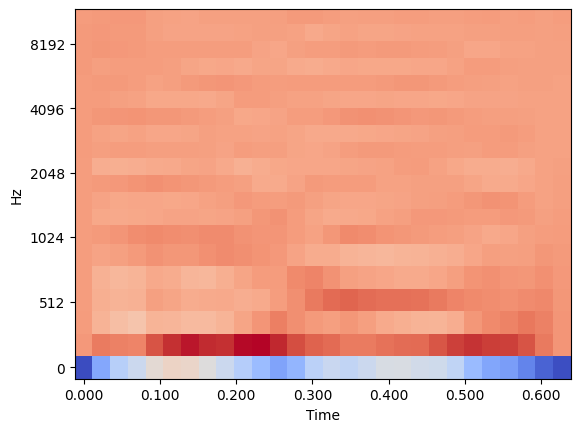

In [26]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time', y_axis='mel')

## Load and display multiple words

In [16]:
def load_and_display(word: str):
    x, fs = librosa.load(f'./data/audio/wav/{word}.wav')
    mfccs = librosa.feature.mfcc(x, sr=fs)
    librosa.display.specshow(mfccs, sr=fs, x_axis='time', y_axis='mel')
    print(mfccs.shape)
    
    

(20, 28)


/var/folders/2c/hmpw9qgd7fd3x0ms6548_f880000gn/T/ipykernel_44038/2004407008.py:3: FutureWarning: Pass y=[-7.0362070e-08 -1.0875071e-07  3.4859292e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


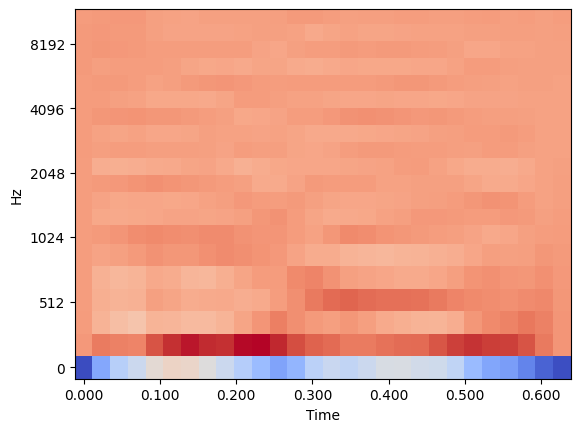

In [21]:
load_and_display("旁边")

## Compute features from MFCCs of audio files

In [31]:
import os
import numpy as np
import librosa

wav_dir = './data/audio/wav'
words, features = [], []

for file in os.listdir(wav_dir):
    if file.endswith('.wav'):
        word = os.path.splitext(file)[0]
        words.append(word)
        x, fs = librosa.load(os.path.join(wav_dir, file))
        mfccs = librosa.feature.mfcc(y=x, sr=fs)
        features.append(np.concatenate([mfccs.mean(axis=1), mfccs.std(axis=1)]))

features_array = np.array(features)

In [33]:
words[0:10], features_array[0:10]

(['近代', '岛屿', '题', '因为', '发', '寄', '橡皮', '超市', '输', '页'],
 array([[-2.61201416e+02,  9.62864227e+01, -1.00847902e+01,
          3.00839500e+01, -1.63639221e+01, -2.91915970e+01,
          2.17715549e+00,  6.80273438e+00, -1.19855785e+01,
         -1.06807423e+01, -1.49092674e+01,  6.68734193e-01,
         -1.81302967e+01,  6.36084032e+00, -1.16585722e+01,
          6.86069846e-01, -1.56099644e+01,  9.02863979e-01,
         -1.32495785e+01, -1.05858159e+00,  1.43533218e+02,
          8.95118866e+01,  6.04886856e+01,  3.39846725e+01,
          1.46797781e+01,  1.78717480e+01,  1.28900013e+01,
          1.22137794e+01,  1.82089634e+01,  1.02289639e+01,
          7.74145412e+00,  7.39458084e+00,  8.71688175e+00,
          8.25337124e+00,  1.32334146e+01,  5.03062773e+00,
          7.56135941e+00,  9.01045704e+00,  7.48625708e+00,
          8.09232807e+00],
        [-2.76059418e+02,  1.48527161e+02, -2.93669090e+01,
          3.78198433e+01, -1.20307398e+00, -3.13162785e+01,
          1.455

/Users/me/.pyenv/versions/3.10.14/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/me/.pyenv/versions/3.10.14/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/var/folders/2c/hmpw9qgd7fd3x0ms6548_f880000gn/T/ipykernel_44038/1135939209.py:28: UserWarning: Glyph 36214 (\N{CJK UNIFIED IDEOGRAPH-8D76}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2c/hmpw9qgd7fd3x0ms6548_f880000gn/T/ipykernel_44038/1135939209.py:28: UserWarning: Glyph 32039 (\N{CJK UNIFIED IDEOGRAPH-7D27}) missing f

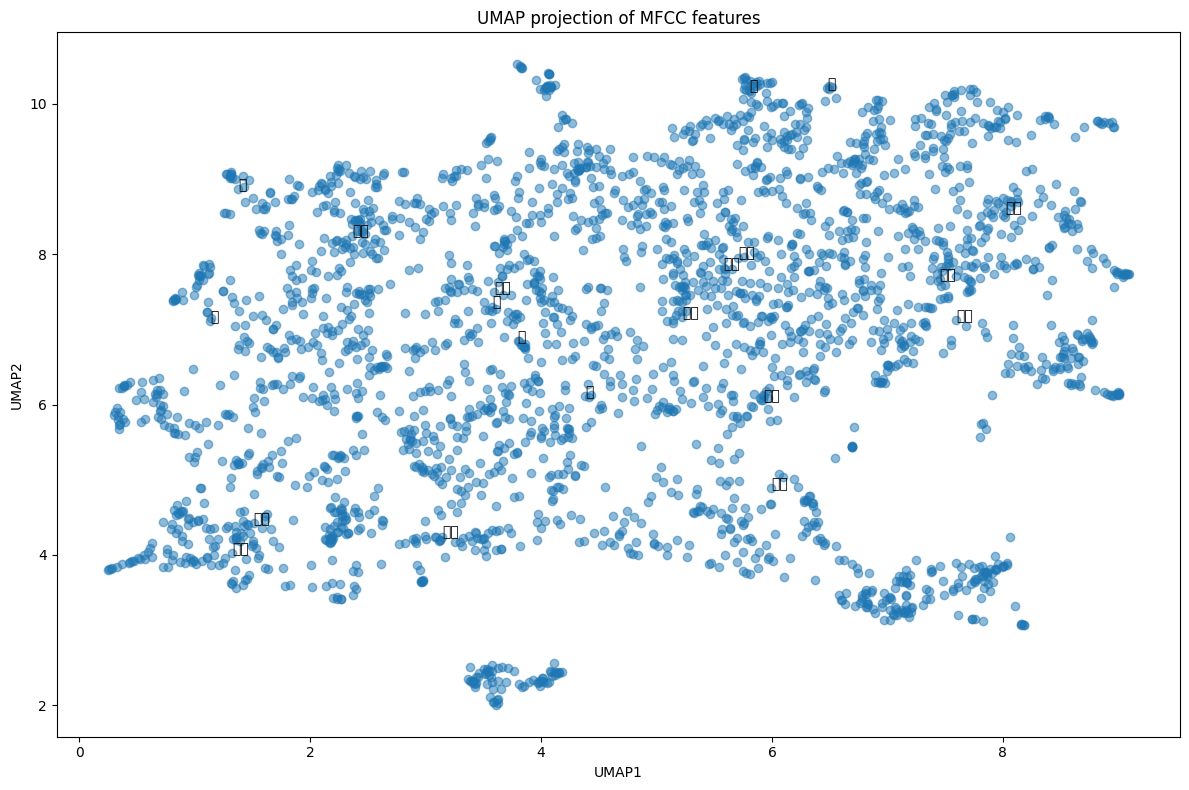

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.preprocessing import StandardScaler

# Assuming words and features_array are already defined

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_array)

# Apply UMAP
umap_model = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embeddings = umap_model.fit_transform(scaled_features)

# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], alpha=0.5)

# Add labels for some points (adjust n for more or fewer labels)
n = 20  # number of labels to show
for i in np.random.choice(len(words), n, replace=False):
    plt.annotate(words[i], (embeddings[i, 0], embeddings[i, 1]))

plt.title('UMAP projection of MFCC features')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.tight_layout()
plt.show()

## Using Altair

In [36]:
import numpy as np
import altair as alt
import pandas as pd
from umap import UMAP
from sklearn.preprocessing import StandardScaler

# Assuming words and features_array are already defined

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_array)

# Apply UMAP
umap_model = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embeddings = umap_model.fit_transform(scaled_features)

# Create a DataFrame for Altair
df = pd.DataFrame({
    'x': embeddings[:, 0],
    'y': embeddings[:, 1],
    'word': words
})

# Create the scatter plot
scatter = alt.Chart(df).mark_circle(size=60).encode(
    x='x:Q',
    y='y:Q',
    tooltip=['word']
).properties(
    width=800,
    height=600,
    title='UMAP projection of MFCC features'
)

# Add text labels
text = scatter.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='word'
).transform_sample(100)  # Randomly sample 100 points to label

# Combine scatter and text layers
chart = (scatter + text).interactive()

chart

/Users/me/.pyenv/versions/3.10.14/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


alt.LayerChart(...)